# <span style="color:magenta"> Solenoid Field <span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')


#### The code snippet below will import $solenoid.txt$ and it will generate the necessary two arrays: longitudinal distance $z$ in cm and $B_z$ in Gauss

In [2]:
with open("solenoid.txt") as f:
      mtr = [line.split() for line in f.readlines()]
      z =list(map(float, [row[1] for row in mtr]))
      Bz=list(map(float, [row[2] for row in mtr]))
        
f.close()

In [ ]:
import seaborn as sns
from scipy.integrate import trapezoid
sns.set_theme()

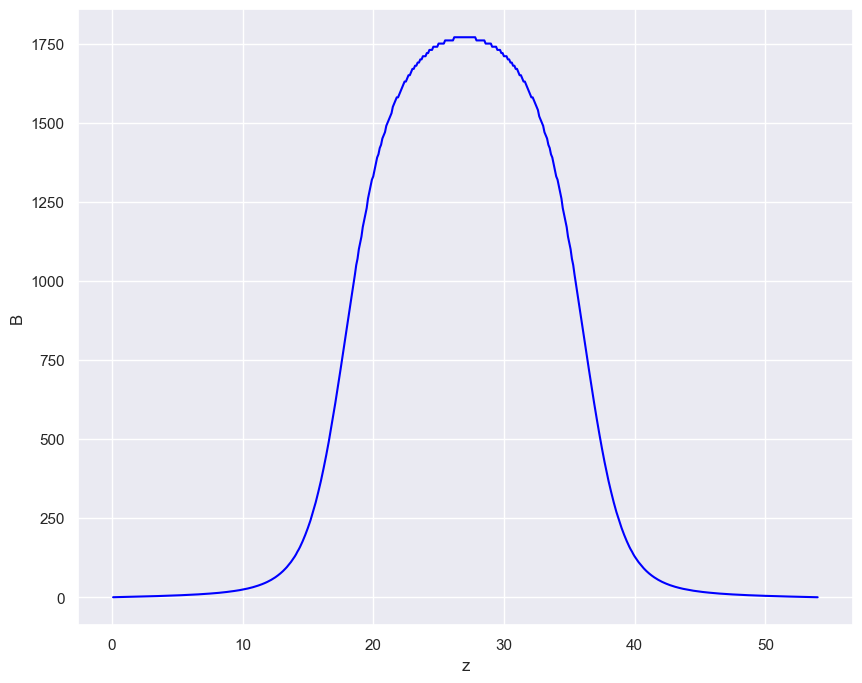

In [4]:
plt.figure(figsize = (10, 8))
plt.plot(z, Bz, color = "blue")
plt.xlabel("z")
plt.ylabel("B")
plt.grid("on")
plt.show()

### After the plot, as you can see, the solenoid has fringes elongated in z-axis. Actually the physical length of this solenoid is $l_{physical}$ = 20 cm, but there is no pure (flat) $B_z$ field along this 20 cm.  So, you may find and cite a paper, textbook, lecture note to find a formula for effective magnetic length and effective magnetic field strength of a solenoid and calculate $B_{eff}$ and $l_{eff}$

Definite integral in Python can be solved in different ways: trapezoid or simpson methods ...

In [5]:
# Link to my source: https://people.nscl.msu.edu/~lund/msu/phy905_2020/lec_lund/03.solenoids.pdf -> page 19
# or https://people.nscl.msu.edu/~lund/uspas/ap_2018/lec_lund/18.solenoid_ho.pdf -> page 14, C12

squareBz = [i**2 for i in Bz]
leff = (trapezoid(x = z, y = Bz))**2/trapezoid(x = z, y = squareBz)
Beff = trapezoid(x = z, y = squareBz)/trapezoid(x = z, y = Bz)
print("leff = {} and Beff = {}".format(leff, Beff)) 

leff = 21.9639657079397 and Beff = 1432.2178926289535


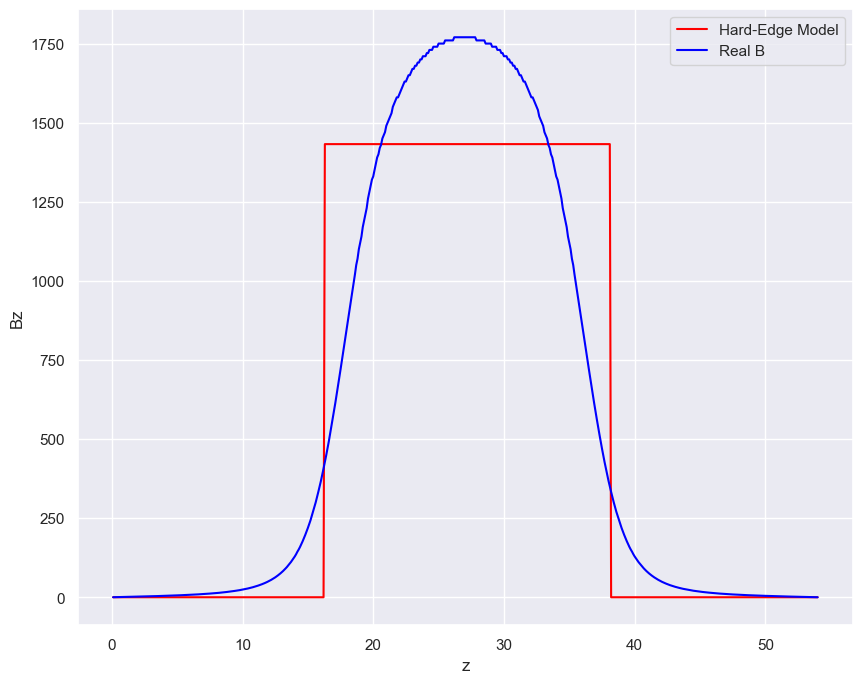

In [9]:
# Plot hard-edge model
mid_point = Bz.index(max(Bz))
hard_edge_Bz = [0 if (i < (z[mid_point]+1 - leff/2) or i > (z[mid_point]+1 + leff/2)) else Beff for i in z]
plt.figure(figsize = (10, 8))
plt.plot(z, hard_edge_Bz, color = "red", label = "Hard-Edge Model")
plt.plot(z, Bz, color = "blue", label = "Real B")
plt.xlabel("z")
plt.ylabel("Bz")
plt.legend()
plt.grid("on")
plt.show()